IMPORTING ALL THE REQUIRED LIBRARIES

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

READING THE DATASET USING PANDAS LIBRARY

In [26]:
#Importing the Death dataset file
coviddeath = pd.read_csv("time_series_covid19_deaths_global.csv")
#to get the first n rows
coviddeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


DATA PREPROCESSING:

CHECKING FOR THE NULL VALUES IN THE DATASET

In [27]:
#looking at the shape (lengths of the corresponding array dimension) 
coviddeath.shape

(266, 248)

In [28]:
# looking at the different locations
coviddeath["Country/Region"].value_counts()

China             33
Canada            14
France            11
United Kingdom    11
Australia          8
                  ..
New Zealand        1
Pakistan           1
US                 1
Argentina          1
Estonia            1
Name: Country/Region, Length: 188, dtype: int64

In [29]:
#getting the sum of null values across each colum
coviddeath.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

FILLING THE MISSING VALUES WITH THEIR RESPECTIVE COUNTRY NAMES

In [30]:
#filling the missing values with corresponding country
coviddeath["Province/State"] = coviddeath["Province/State"].fillna(coviddeath["Country/Region"])

In [31]:
coviddeath.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
9/17/20           0
9/18/20           0
9/19/20           0
9/20/20           0
9/21/20           0
Length: 248, dtype: int64

In [32]:
coviddeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,Albania,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,Algeria,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,Andorra,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,Angola,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


DROPPING THE COLUMNS WHICH ARE NOT MUCH NECESSARY FOR PREDICTION

In [33]:
# Removing rows or columns by specifying label names and corresponding axis
coviddeath.drop(["Country/Region","Lat","Long"],inplace=True,axis=1)
coviddeath.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,Albania,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,Algeria,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,Andorra,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,Angola,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [34]:
coviddeath.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,0.642857,0.800752,...,3459.515038,3473.206767,3489.860902,3514.481203,3536.109023,3556.620301,3578.071429,3597.740602,3611.635338,3622.906015
std,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,9.933187,12.507875,...,16398.950919,16453.471108,16510.259597,16636.850630,16739.311674,16831.543769,16934.234212,17019.787840,17068.307397,17102.864472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,57.000000,57.000000,58.000000,59.000000,60.500000,61.500000,62.500000,64.000000,64.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,588.000000,588.250000,611.500000,620.500000,620.500000,622.500000,629.000000,635.750000,645.500000,647.500000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,193693.000000,194071.000000,194493.000000,195781.000000,196763.000000,197633.000000,198570.000000,199282.000000,199509.000000,199865.000000


SET THE PROVINCE/STATE COLUMN AS INDEX FOR EASY UNDERSTANDING

In [35]:
highest_deathcases=coviddeath.set_index("Province/State")
highest_deathcases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
Albania,0,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
Algeria,0,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [36]:
#Selecting 5 countries to make the future prediction
highest_deathcases = highest_deathcases.loc[['US','Turkey','United Kingdom','Austria','Argentina','Belgium','Brazil','Italy','Iran','India','Netherlands']]
highest_deathcases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,193693,194071,194493,195781,196763,197633,198570,199282,199509,199865
Turkey,0,0,0,0,0,0,0,0,0,0,...,6999,7056,7119,7186,7249,7315,7377,7445,7506,7574
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,41623,41628,41637,41664,41684,41705,41732,41759,41777,41788
Austria,0,0,0,0,0,0,0,0,0,0,...,754,756,757,757,758,758,763,765,766,767
Argentina,0,0,0,0,0,0,0,0,0,0,...,11263,11352,11667,11852,12116,12460,12656,12799,13053,13482
Belgium,0,0,0,0,0,0,0,0,0,0,...,9923,9925,9927,9930,9935,9936,9937,9944,9948,9950
Brazil,0,0,0,0,0,0,0,0,0,0,...,131210,131625,132006,133119,134106,134935,135793,136532,136895,137272
Italy,0,0,0,0,0,0,0,0,0,0,...,35603,35610,35624,35633,35645,35658,35668,35692,35707,35724
Iran,0,0,0,0,0,0,0,0,0,0,...,23029,23157,23313,23453,23632,23808,23952,24118,24301,24478


In [37]:
#Applying Transpose for better plotting of prediction
highest_deathcases = highest_deathcases.T
highest_deathcases.head()

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,Netherlands
1/22/20,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0


PLOTTING THE COVID CASES OF 5 FIVE WITH MOST HIGHEST INCREASE RATE

<AxesSubplot:>

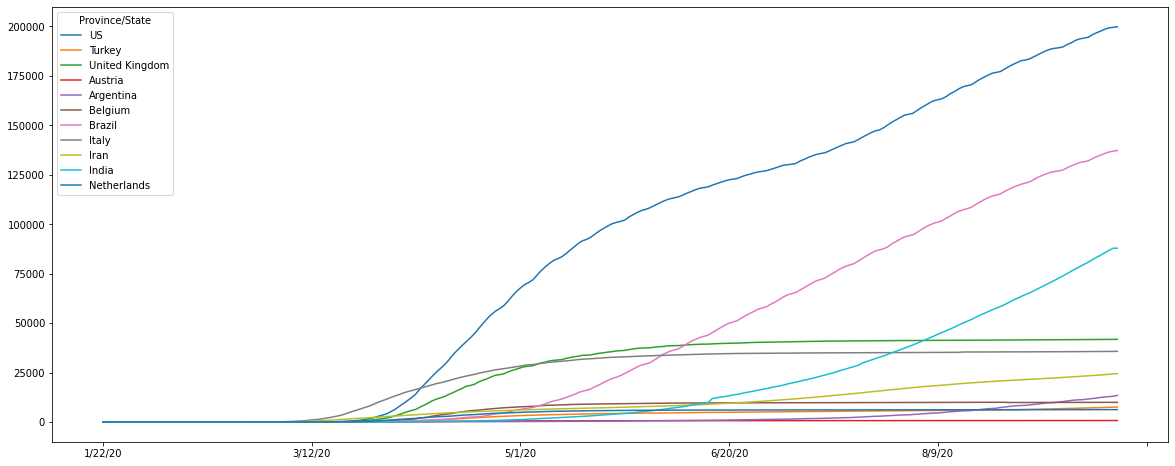

In [38]:
highest_deathcases.plot(figsize=(20,8))

CHECKING THE STATIONARITY: AUGUMENTED DICKEY FULLER TEST(ADF Test)

In [39]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("ADF: ", dftest[0])
    print("P-value: ", dftest[1])
    print("Num of lags used: ", dftest[2])
    print("Critical values: ")
    for key, val in dftest[4].items():
        print("\t",key, ": ",val)

In [40]:
countries = ["US","Brazil","India","Austria","Italy"]
ad_test_results=[]
for i in countries:
    ad_test_results.append(ad_test(highest_deathcases[i]))

ADF:  -0.4692387230459535
P-value:  0.8978808591833158
Num of lags used:  15
Critical values: 
	 1% :  -3.4593607492757554
	 5% :  -2.8743015807562924
	 10% :  -2.5735714042782396
ADF:  -3.1829428795688823
P-value:  0.020993486662122827
Num of lags used:  14
Critical values: 
	 1% :  -3.4592326027153493
	 5% :  -2.8742454699025872
	 10% :  -2.5735414688888465
ADF:  -0.9522401894402597
P-value:  0.7702828447066536
Num of lags used:  8
Critical values: 
	 1% :  -3.4584868856997004
	 5% :  -2.873918902362675
	 10% :  -2.573367247623359
ADF:  -1.8449049539302227
P-value:  0.3584063535127182
Num of lags used:  6
Critical values: 
	 1% :  -3.4582467982399105
	 5% :  -2.8738137461081323
	 10% :  -2.5733111490323846
ADF:  -1.9197132018224357
P-value:  0.3228449781780075
Num of lags used:  10
Critical values: 
	 1% :  -3.458731141928624
	 5% :  -2.8740258764297293
	 10% :  -2.5734243167124093


In the above result we have found the different notations for 6 countries. For checking whether the specific country is stationary or not we have 2 ways:

If P-value < 5%(0.05) - we can reject the null hypothesis and model is said to be stationary, else it is said to be non-stationary
If ADF value < Critical Value - model is said to be stationary, else it is said to be non-stationary
To get better prediction, we prefer the model to be in stationary, so we need to apply some transformations like "log","sqrt","1st difference of sqrt" etc. to make better predictions

In [41]:
#US
highest_deathcases["US_sqrt"] = np.log(highest_deathcases["US"])
highest_deathcases["US_sqrt_diff"] = highest_deathcases["US_sqrt"] - highest_deathcases["US_sqrt"].shift(1)
#highest_deathcases["US_sqrt_diff"].plot(figsize=(20,8),legend=True)
# Russia
highest_deathcases["I_sqrt"] = np.log(highest_deathcases["India"])
highest_deathcases["I_sqrt_diff"] = highest_deathcases["I_sqrt"] - highest_deathcases["I_sqrt"].shift(1)
#highest_deathcases["I_sqrt_diff"].plot(figsize=(20,8),legend=True)
#Brazil
highest_deathcases["B_sqrt"] = np.log(highest_deathcases["Brazil"])
highest_deathcases["B_sqrt_diff"] = highest_deathcases["B_sqrt"] - highest_deathcases["B_sqrt"].shift(1)
#highest_deathcases["B_sqrt_diff"].plot(figsize=(20,8),legend=True)
#Colombia
highest_deathcases["A_sqrt"] = np.log(highest_deathcases["Austria"])
highest_deathcases["A_sqrt_diff"] = highest_deathcases["A_sqrt"] - highest_deathcases["A_sqrt"].shift(1)
#highest_deathcases["A_sqrt_diff"].plot(figsize=(20,8),legend=True)
#Peru
highest_deathcases["IT_sqrt"]=np.log(highest_deathcases["Italy"])
highest_deathcases["IT_sqrt_diff"] = highest_deathcases["IT_sqrt"] - highest_deathcases["IT_sqrt"].shift(1)
#highest_deathcases["IT_sqrt_diff"].plot(figsize=(20,8),legend=True)


In [42]:
#Replacing inf values with nan and then dropping them
highest_deathcases=highest_deathcases.replace([np.inf,-np.inf],np.nan).dropna()
highest_deathcases.head()

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,...,US_sqrt,US_sqrt_diff,I_sqrt,I_sqrt_diff,B_sqrt,B_sqrt_diff,A_sqrt,A_sqrt_diff,IT_sqrt,IT_sqrt_diff
3/18/20,191,1,116,4,2,14,3,2978,1135,3,...,5.252273,0.369472,1.098612,0.000000,1.098612,1.098612,1.386294,0.287682,7.999007,0.173762
3/19/20,265,3,162,6,3,21,6,3405,1284,4,...,5.579730,0.327456,1.386294,0.287682,1.791759,0.693147,1.791759,0.405465,8.133000,0.133993
3/20/20,364,4,194,6,3,37,11,4032,1433,5,...,5.897154,0.317424,1.609438,0.223144,2.397895,0.606136,1.791759,0.000000,8.302018,0.169018
3/21/20,463,9,252,8,4,67,15,4825,1556,4,...,6.137727,0.240573,1.386294,-0.223144,2.708050,0.310155,2.079442,0.287682,8.481566,0.179548
3/22/20,573,30,288,16,4,75,25,5476,1685,7,...,6.350886,0.213159,1.945910,0.559616,3.218876,0.510826,2.772589,0.693147,8.608130,0.126564


In [43]:
#Now check the stationarity using ADF test, which have better values than before
ad_test(highest_deathcases["I_sqrt_diff"])
ad_test(highest_deathcases["US_sqrt_diff"])
ad_test(highest_deathcases["B_sqrt_diff"])
ad_test(highest_deathcases["IT_sqrt_diff"])
ad_test(highest_deathcases["A_sqrt_diff"])

ADF:  -6.805582894168208
P-value:  2.18107098638465e-09
Num of lags used:  14
Critical values: 
	 1% :  -3.4687256239864017
	 5% :  -2.8783961376954363
	 10% :  -2.57575634100705
ADF:  -5.8790005968353825
P-value:  3.1103287226507074e-07
Num of lags used:  15
Critical values: 
	 1% :  -3.468952197801766
	 5% :  -2.878495056473015
	 10% :  -2.57580913601947
ADF:  -6.379198267907061
P-value:  2.2441508964610122e-08
Num of lags used:  12
Critical values: 
	 1% :  -3.4682803641749267
	 5% :  -2.8782017240816327
	 10% :  -2.5756525795918366
ADF:  -4.20235276631775
P-value:  0.0006528838384234392
Num of lags used:  13
Critical values: 
	 1% :  -3.4685016947910636
	 5% :  -2.8782983668563396
	 10% :  -2.57570415906989
ADF:  -9.317728110387863
P-value:  1.0085211616555728e-15
Num of lags used:  14
Critical values: 
	 1% :  -3.4687256239864017
	 5% :  -2.8783961376954363
	 10% :  -2.57575634100705


RUNNING THE AUTO_ARIMA ON 5 COUNTRIES TO KNOW THE BEST ARIMA MODEL FOR FUTHER PREDICTIONS

In [44]:
stepwise_fit = auto_arima(highest_deathcases["I_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_deathcases["US_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_deathcases["B_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_deathcases["IT_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_deathcases["A_sqrt_diff"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-512.624, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-309.816, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-356.706, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-458.533, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-311.816, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-496.778, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-514.624, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-444.925, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-463.449, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-512.624, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-501.157, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-510.798, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-514.023, Time=0.20 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.350 seconds
Performing stepwise se

In [45]:
print(highest_deathcases.shape)

(188, 21)


SPLITTING THE DATA INTO TRAIN AND TEST. CONSIDER THE PERCENTAGE AS TRAIN:87% TEST:13%

In [46]:
train_cases = highest_deathcases.iloc[:-30]
test_cases = highest_deathcases.iloc[-30:]
print(train_cases.shape,test_cases.shape)

(158, 21) (30, 21)


In [47]:
highest_deathcases.head()

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,...,US_sqrt,US_sqrt_diff,I_sqrt,I_sqrt_diff,B_sqrt,B_sqrt_diff,A_sqrt,A_sqrt_diff,IT_sqrt,IT_sqrt_diff
3/18/20,191,1,116,4,2,14,3,2978,1135,3,...,5.252273,0.369472,1.098612,0.000000,1.098612,1.098612,1.386294,0.287682,7.999007,0.173762
3/19/20,265,3,162,6,3,21,6,3405,1284,4,...,5.579730,0.327456,1.386294,0.287682,1.791759,0.693147,1.791759,0.405465,8.133000,0.133993
3/20/20,364,4,194,6,3,37,11,4032,1433,5,...,5.897154,0.317424,1.609438,0.223144,2.397895,0.606136,1.791759,0.000000,8.302018,0.169018
3/21/20,463,9,252,8,4,67,15,4825,1556,4,...,6.137727,0.240573,1.386294,-0.223144,2.708050,0.310155,2.079442,0.287682,8.481566,0.179548
3/22/20,573,30,288,16,4,75,25,5476,1685,7,...,6.350886,0.213159,1.945910,0.559616,3.218876,0.510826,2.772589,0.693147,8.608130,0.126564


FITTING MODELS OF 6 COUNTRIES USING ARIMA WITH THE BEST ARIMA MODEL ORDER, WHICH WE FOUND PREVIOUSLY AND PLOTTING ALL OF THEM IN ONE PLOT

<AxesSubplot:>

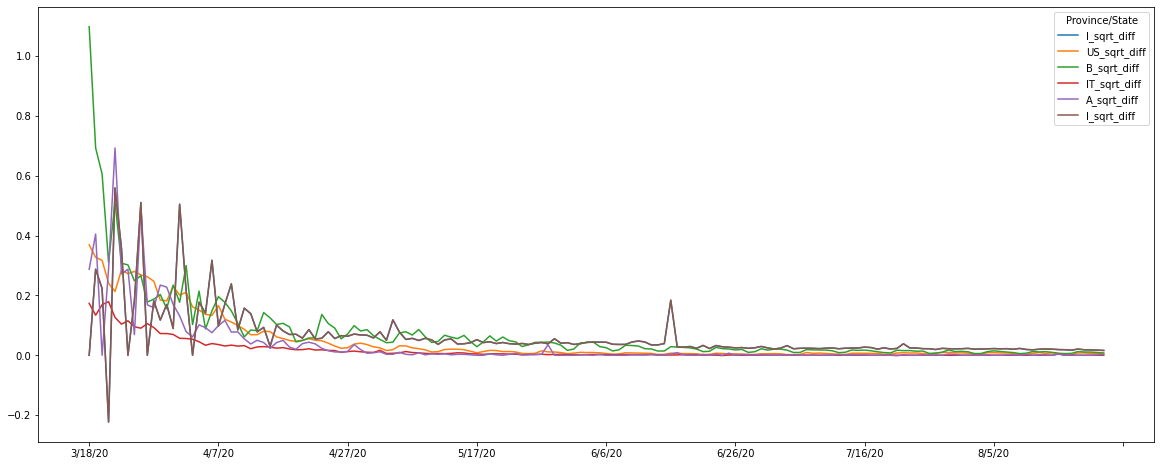

In [48]:
B_model = ARIMA(train_cases["B_sqrt_diff"],order=(1,2,2))
I_model = ARIMA(train_cases["I_sqrt_diff"],order=(2,1,1))
US_model = ARIMA(train_cases["US_sqrt_diff"],order=(2,2,5))
IT_model = ARIMA(train_cases["IT_sqrt_diff"],order=(3,2,1))
A_model = ARIMA(train_cases["A_sqrt_diff"],order=(5,1,4))
B_model= B_model.fit()
I_model = I_model.fit()
US_model = US_model.fit()
IT_model=IT_model.fit()
A_model = A_model.fit()
train_cases.plot(y=["I_sqrt_diff","US_sqrt_diff","B_sqrt_diff","IT_sqrt_diff","A_sqrt_diff","I_sqrt_diff"],figsize=(20,8))


PREDICTING THE NEXT 30 DAYS COVID CASES FOR 5 COUNTRIES TAKEN

In [49]:
start = len(train_cases)
end = len(train_cases)+len(test_cases)-1
I_prediction = I_model.predict(start=start,end=end,typ="levels").rename("India")
US_prediction = US_model.predict(start=start,end=end,typ="levels").rename("US")
B_prediction = B_model.predict(start=start,end=end,typ="levels").rename("Brazil")
IT_prediction = IT_model.predict(start=start,end=end,typ="levels").rename("Italy")
A_prediction = A_model.predict(start=start,end=end,typ="levels").rename("Austria")
print("India")
print(I_prediction)
print("US")
print(US_prediction)
print("Brazil")
print(B_prediction)
print("Italy")
print(IT_prediction)
print("Austria")
print(A_prediction)
#If index is not as date then use below code
#prediction.index = highest_cases.index[start:end+1]
#print(prediction)

India
2020-08-23    0.011162
2020-08-24    0.012004
2020-08-25    0.012060
2020-08-26    0.009448
2020-08-27    0.008584
2020-08-28    0.008229
2020-08-29    0.006710
2020-08-30    0.005512
2020-08-31    0.004757
2020-09-01    0.003613
2020-09-02    0.002433
2020-09-03    0.001474
2020-09-04    0.000422
2020-09-05   -0.000697
2020-09-06   -0.001735
2020-09-07   -0.002778
2020-09-08   -0.003861
2020-09-09   -0.004921
2020-09-10   -0.005972
2020-09-11   -0.007039
2020-09-12   -0.008103
2020-09-13   -0.009161
2020-09-14   -0.010223
2020-09-15   -0.011286
2020-09-16   -0.012346
2020-09-17   -0.013407
2020-09-18   -0.014470
2020-09-19   -0.015531
2020-09-20   -0.016592
2020-09-21   -0.017654
Freq: D, Name: India, dtype: float64
US
2020-08-23    0.011011
2020-08-24    0.006066
2020-08-25    0.010229
2020-08-26    0.007780
2020-08-27    0.009782
2020-08-28    0.010573
2020-08-29    0.010051
2020-08-30    0.012340
2020-08-31    0.011914
2020-09-01    0.013371
2020-09-02    0.014359
2020-09-03 

In [50]:
#checking the shape of prediction,which should be equal to test_cases size
I_prediction.shape,US_prediction.shape,B_prediction.shape,IT_prediction.shape,A_prediction.shape

((30,), (30,), (30,), (30,), (30,))

<AxesSubplot:>

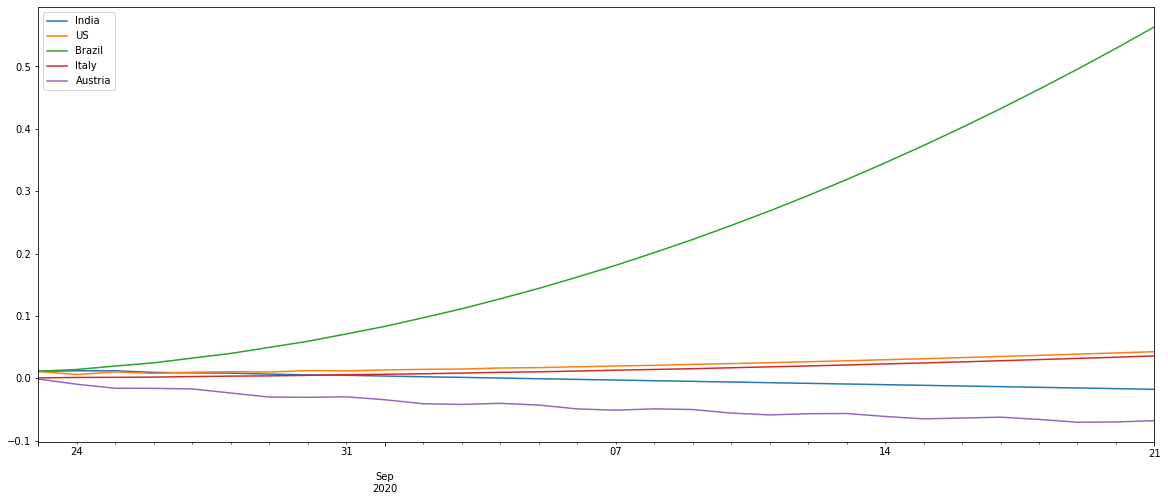

In [51]:
#Prediction plot of Russia
I_prediction.plot(figsize=(20,8),legend=True)
#Prediction plot for US
US_prediction.plot(figsize=(20,8),legend=True)
#Prediction plot for Brazil
B_prediction.plot(figsize=(20,8),legend=True)
#Prediiction plot for Colombia
IT_prediction.plot(figsize=(20,8),legend=True)
#Prediction plot for Peru
A_prediction.plot(figsize=(20,8),legend=True)

EVALUATING THE MODEL WITH PREDICTION AND TEST CASES FOR 5 COUNTRIES USING MEAN_SQUARED_ERROR METHOD

In [52]:
# Evaluation
I_result = sqrt(mean_squared_error(I_prediction,test_cases["I_sqrt_diff"]))
US_result = sqrt(mean_squared_error(US_prediction,test_cases["US_sqrt_diff"]))
B_result = sqrt(mean_squared_error(B_prediction,test_cases["B_sqrt_diff"]))
A_result = sqrt(mean_squared_error(A_prediction,test_cases["A_sqrt_diff"]))
IT_result = sqrt(mean_squared_error(IT_prediction,test_cases["IT_sqrt_diff"]))
print(I_result)
print(US_result)
print(B_result)
print(A_result)
print(IT_result)

0.018728303131770666
0.02047085176976883
0.2674644682768274
0.050117575638804264
0.017661549489831847


AS WE GOT SMALL ERROR, WE NOW MOVE TO FIT THE ARIMA MODEL ON COMPLETE DATASET AND PREDICT THE FUTURE COVID CASES FOR NEXT 30 DAYS

In [53]:
# FITTING THE ARIMA MODEL ON 5 COUNTRIES FOR FUTURE PREDICTION
I_final_model = ARIMA(highest_deathcases["I_sqrt_diff"],order=(2,1,1))
I_final_model = I_final_model.fit()
US_final_model = ARIMA(highest_deathcases["US_sqrt_diff"],order=(2,2,5))
US_final_model = US_final_model.fit()
B_final_model = ARIMA(highest_deathcases["B_sqrt_diff"],order=(1,2,2))
B_final_model = B_final_model.fit()
IT_final_model = ARIMA(highest_deathcases["IT_sqrt_diff"],order=(3,2,1))
IT_final_model = IT_final_model.fit()
A_final_model = ARIMA(highest_deathcases["A_sqrt_diff"],order=(5,1,4))
A_final_model = A_final_model.fit()
#Checking the last 5 values to make the predictions after that date
highest_deathcases.tail()

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,...,US_sqrt,US_sqrt_diff,I_sqrt,I_sqrt_diff,B_sqrt,B_sqrt_diff,A_sqrt,A_sqrt_diff,IT_sqrt,IT_sqrt_diff
9/17/20,197633,7315,41705,758,12460,9936,134935,35658,23808,84372,...,12.194167,0.004412,11.342991,0.014012,11.812548,0.006163,6.630683,0.000000,10.481729,0.000365
9/18/20,198570,7377,41732,763,12656,9937,135793,35668,23952,85619,...,12.198897,0.004730,11.357663,0.014672,11.818887,0.006338,6.637258,0.006575,10.482009,0.000280
9/19/20,199282,7445,41759,765,12799,9944,136532,35692,24118,86752,...,12.202476,0.003579,11.370809,0.013146,11.824314,0.005427,6.639876,0.002618,10.482682,0.000673
9/20/20,199509,7506,41777,766,13053,9948,136895,35707,24301,87882,...,12.203615,0.001138,11.383750,0.012942,11.826969,0.002655,6.641182,0.001306,10.483102,0.000420
9/21/20,199865,7574,41788,767,13482,9950,137272,35724,24478,87882,...,12.205397,0.001783,11.383750,0.000000,11.829720,0.002750,6.642487,0.001305,10.483578,0.000476


PREDICT THE FUTURE COVID CASES FOR NEXT 30 DAYS FROM THE LAST DATE THE DATASET ENDS AND PRINTING THE PREDICTION IN SUITABLE FORMAT FOR EASY PLOTTING(having index as dates)

In [54]:
future_dates = pd.date_range(start='2020-09-21',end='2020-10-21')
I_final_prediction = I_final_model.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ='levels').rename('India')
US_final_prediction = US_final_model.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ='levels').rename('US')
B_final_prediction = B_final_model.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ='levels').rename('Brazil')
IT_final_prediction = IT_final_model.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ='levels').rename('Italy')
A_final_prediction = A_final_model.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ='levels').rename('Austria')
#To convert the index to dates we do the following code
I_final_prediction.index = future_dates
US_final_prediction.index=future_dates
B_final_prediction.index = future_dates
IT_final_prediction.index = future_dates
A_final_prediction.index = future_dates
print("For India")
print(I_final_prediction)
print("For US")
print(US_final_prediction)
print("For Brazil")
print(B_final_prediction)
print("For Italy")
print(IT_final_prediction)
print("For Austria")
print(A_final_prediction)

For India
2020-09-21    0.010512
2020-09-22    0.010114
2020-09-23    0.002978
2020-09-24    0.004927
2020-09-25    0.005815
2020-09-26    0.002498
2020-09-27    0.001853
2020-09-28    0.002056
2020-09-29    0.000437
2020-09-30   -0.000706
2020-10-01   -0.001139
2020-10-02   -0.002177
2020-10-03   -0.003281
2020-10-04   -0.004036
2020-10-05   -0.004933
2020-10-06   -0.005940
2020-10-07   -0.006818
2020-10-08   -0.007703
2020-10-09   -0.008653
2020-10-10   -0.009566
2020-10-11   -0.010463
2020-10-12   -0.011388
2020-10-13   -0.012307
2020-10-14   -0.013215
2020-10-15   -0.014131
2020-10-16   -0.015049
2020-10-17   -0.015961
2020-10-18   -0.016876
2020-10-19   -0.017792
2020-10-20   -0.018706
2020-10-21   -0.019621
Freq: D, Name: India, dtype: float64
For US
2020-09-21    0.008515
2020-09-22    0.004571
2020-09-23    0.006408
2020-09-24    0.005738
2020-09-25    0.006358
2020-09-26    0.007272
2020-09-27    0.006884
2020-09-28    0.008320
2020-09-29    0.008305
2020-09-30    0.009104
202

<AxesSubplot:>

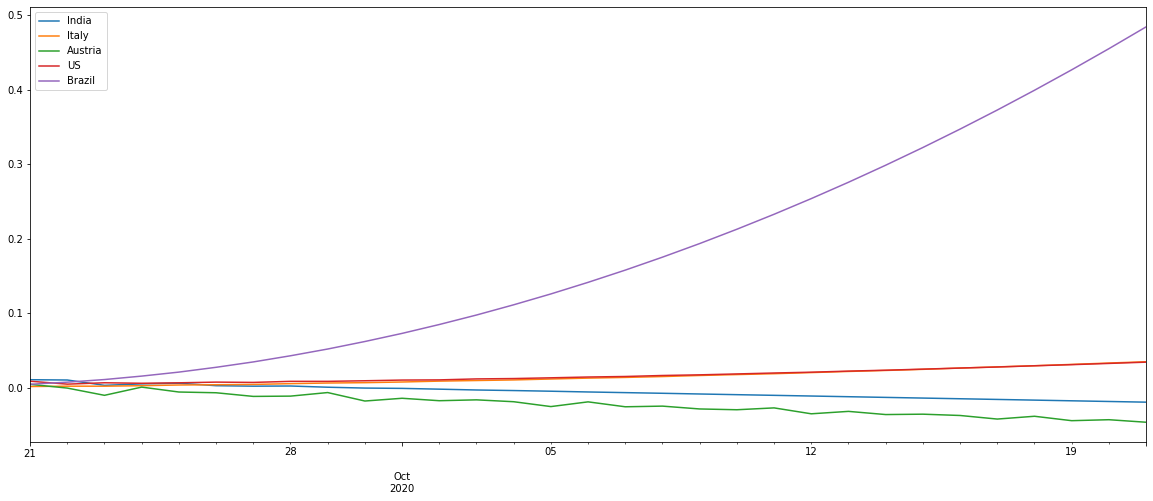

In [55]:
I_final_prediction.plot(figsize=(20,8),legend=True)
IT_final_prediction.plot(figsize=(20,8),legend=True)
A_final_prediction.plot(figsize=(20,8),legend=True)
US_final_prediction.plot(figsize=(20,8),legend=True)
B_final_prediction.plot(figsize=(20,8),legend=True)

THE PREVIOUS GRAPH INDICATES THE TRANSFORMED ONE, BUT INORDER TO FIND THE EXACT FUTURE COVID CASES WE NEED TO BACK TRANSFORM THE DATA, WHICH IS DONE IN THE FOLLOWING

In [56]:
US_back_trans = np.cumsum(highest_deathcases["US_sqrt_diff"])
highest_deathcases["US_back_transformed"] = US_back_trans**2
I_back_trans = np.cumsum(highest_deathcases["I_sqrt_diff"])
highest_deathcases["I_back_transformed"] = I_back_trans**2
B_back_trans = np.cumsum(highest_deathcases["B_sqrt_diff"])
highest_deathcases["B_back_transformed"] = B_back_trans**2
IT_back_trans = np.cumsum(highest_deathcases["IT_sqrt_diff"])
highest_deathcases["IT_back_transformed"] = IT_back_trans**2
A_back_trans = np.cumsum(highest_deathcases["A_sqrt_diff"])
highest_deathcases["A_back_transformed"] = A_back_trans**2
highest_deathcases.head()

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,...,B_sqrt_diff,A_sqrt,A_sqrt_diff,IT_sqrt,IT_sqrt_diff,US_back_transformed,I_back_transformed,B_back_transformed,IT_back_transformed,A_back_transformed
3/18/20,191,1,116,4,2,14,3,2978,1135,3,...,1.098612,1.386294,0.287682,7.999007,0.173762,0.136509,0.000000,1.206949,0.030193,0.082761
3/19/20,265,3,162,6,3,21,6,3405,1284,4,...,0.693147,1.791759,0.405465,8.133000,0.133993,0.485709,0.082761,3.210402,0.094713,0.480453
3/20/20,364,4,194,6,3,37,11,4032,1433,5,...,0.606136,1.791759,0.000000,8.302018,0.169018,1.028910,0.260943,5.749902,0.227312,0.480453
3/21/20,463,9,252,8,4,67,15,4825,1556,4,...,0.310155,2.079442,0.287682,8.481566,0.179548,1.574837,0.082761,7.333536,0.430757,0.962026
3/22/20,573,30,288,16,4,75,25,5476,1685,7,...,0.510826,2.772589,0.693147,8.608130,0.126564,2.155270,0.717914,10.361162,0.612909,2.802197


FITTING THE BACK TRANSFORMED MODEL USING ARIMA

In [57]:
#US
US_final = ARIMA(highest_deathcases["US_back_transformed"],order=(2,2,5))
US_final_fit = US_final.fit(disp=0)
#India
I_final = ARIMA(highest_deathcases["I_back_transformed"],order=(2,1,1))
I_final_fit = I_final.fit(disp=0)
#BRAZIL
B_final = ARIMA(highest_deathcases["B_back_transformed"],order=(1,2,2))
B_final_fit = B_final.fit(disp=0)
#ITALY
IT_final = ARIMA(highest_deathcases["IT_back_transformed"],order=(3,2,1))
IT_final_fit = IT_final.fit(disp=0)
#AUSTRIA
A_final = ARIMA(highest_deathcases["A_back_transformed"],order=(5,1,4))
A_final_fit = A_final.fit(disp=0)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

PREDICTING THE FUTURE VALUES OF 5 COUNTRIES AND PLOTTING IN ORIGINAL SCALE

NameError: name 'B_final_fit' is not defined

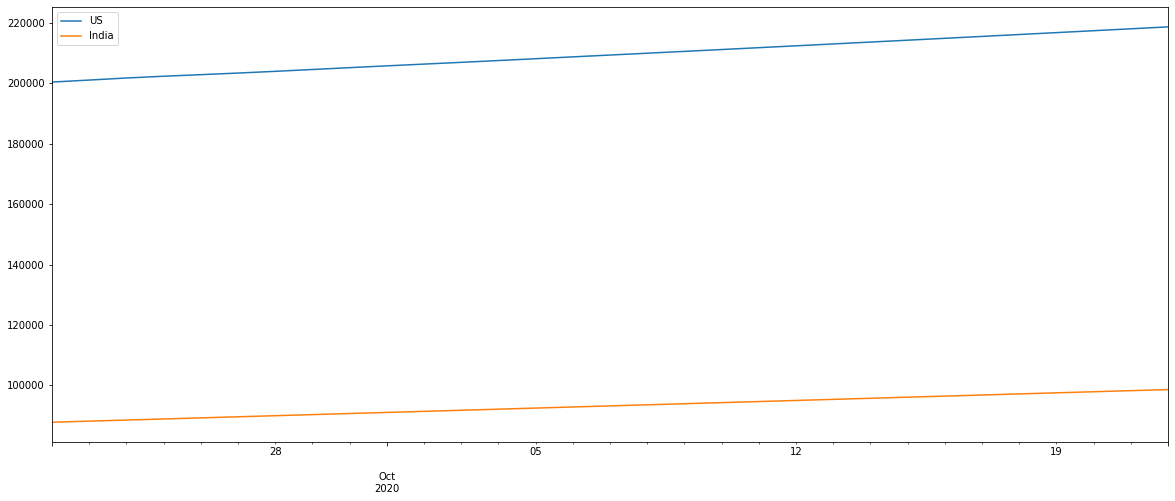

In [48]:
US_back_prediction = US_final_fit.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ="levels").rename("US")
US_back_prediction.plot(figsize=(20,8),legend=True)
I_back_predictions = I_final_fit.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ="levels").rename("India")
I_back_predictions.plot(figsize=(20,8),legend=True)
B_back_predictions = B_final_fit.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ="levels").rename("Brazil")
B_back_predictions.plot(figsize=(20,8),legend=True)
IT_back_predictions = IT_final_fit.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ="levels").rename("Italy")
IT_back_predictions.plot(figsize=(20,8),legend=True)
A_back_predictions = A_final_fit.predict(start=len(highest_deathcases),end=len(highest_deathcases)+30,typ="levels").rename("Austria")
A_back_predictions.plot(figsize=(20,8),legend=True)

2 USING MACHINE LEARNING MODELS

TO PREDICT WE USE THE PAST DATA AND COMBINE THOSE TO MAKE PREDICTIONS ON TEST SET FOR 2 DIFFERENT COUNTRIES TAKEN

In [50]:
#FOR US
highest_deathcases["beforeday US"] = highest_deathcases["US"].shift(+1)
highest_deathcases["2daysbefore US"] = highest_deathcases["US"].shift(+2)
highest_deathcases["3daysbefore US"] = highest_deathcases["US"].shift(+3)
highest_deathcases["4daysbefore US"] = highest_deathcases["US"].shift(+4)

#FOR BRAZIL
highest_deathcases["beforeday BR"] = highest_deathcases["Brazil"].shift(+1)
highest_deathcases["2daysbefore BR"] = highest_deathcases["Brazil"].shift(+2)
highest_deathcases["3daysbefore BR"] = highest_deathcases["Brazil"].shift(+3)
highest_deathcases["4daysbefore BR"] = highest_deathcases["Brazil"].shift(+4)
highest_deathcases.head()

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,...,IT_back_transformed,A_back_transformed,beforeday US,2daysbefore US,3daysbefore US,4daysbefore US,beforeday BR,2daysbefore BR,3daysbefore BR,4daysbefore BR
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


REMOVING THE NAN VALUES IN THE DATASET

In [51]:
highest_deathcases = highest_deathcases.dropna()
highest_deathcases

Province/State,US,Turkey,United Kingdom,Austria,Argentina,Belgium,Brazil,Italy,Iran,India,...,IT_back_transformed,A_back_transformed,beforeday US,2daysbefore US,3daysbefore US,4daysbefore US,beforeday BR,2daysbefore BR,3daysbefore BR,4daysbefore BR
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/31/20,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/17/20,197633,7315,41705,758,12460,9936,134935,35658,23808,84372,...,35658.0,758.0,196763.0,195781.0,194493.0,194071.0,134106.0,133119.0,132006.0,131625.0
9/18/20,198570,7377,41732,763,12656,9937,135793,35668,23952,85619,...,35668.0,763.0,197633.0,196763.0,195781.0,194493.0,134935.0,134106.0,133119.0,132006.0
9/19/20,199282,7445,41759,765,12799,9944,136532,35692,24118,86752,...,35692.0,765.0,198570.0,197633.0,196763.0,195781.0,135793.0,134935.0,134106.0,133119.0
9/20/20,199509,7506,41777,766,13053,9948,136895,35707,24301,87882,...,35707.0,766.0,199282.0,198570.0,197633.0,196763.0,136532.0,135793.0,134935.0,134106.0


CONVERT THE ADDED COLUMN VALUES TO INT FOR 3 COUNTRIES

In [52]:
#FOR US
highest_deathcases["beforeday US"]=highest_deathcases["beforeday US"].astype(int)
highest_deathcases["2daysbefore US"] = highest_deathcases["2daysbefore US"].astype(int)
highest_deathcases["3daysbefore US"] = highest_deathcases["3daysbefore US"].astype(int)
highest_deathcases["4daysbefore US"] = highest_deathcases["4daysbefore US"].astype(int)

#FOR BRAZIL
highest_deathcases["beforeday BR"]   = highest_deathcases["beforeday BR"].astype(int)
highest_deathcases["2daysbefore BR"] = highest_deathcases["2daysbefore BR"].astype(int)
highest_deathcases["3daysbefore BR"] = highest_deathcases["3daysbefore BR"].astype(int)
highest_deathcases["4daysbefore BR"] = highest_deathcases["4daysbefore BR"].astype(int)

NOW COMBINE THESE CREATED COLUMNS AND PREPARE TRAIN AND TEST SETS

In [53]:
#US
x1_US,x2_US,x3_US,x4_US,y_US = highest_deathcases["beforeday US"],highest_deathcases["2daysbefore US"],highest_deathcases["3daysbefore US"],highest_deathcases["4daysbefore US"],highest_deathcases["US"]
x1_US,x2_US,x3_US,x4_US,y_US = np.array(x1_US),np.array(x2_US),np.array(x3_US),np.array(x4_US),np.array(y_US)
x1_US,x2_US,x3_US,x4_US,y_US = x1_US.reshape(-1,1),x2_US.reshape(-1,1),x3_US.reshape(-1,1),x4_US.reshape(-1,1),y_US.reshape(-1,1)
x_US = np.concatenate((x1_US,x2_US,x3_US,x4_US),axis=1)
#print(x_US)

#BRAZIL
x1_BR,x2_BR,x3_BR,x4_BR,y_BR = highest_deathcases["beforeday BR"],highest_deathcases["2daysbefore BR"],highest_deathcases["3daysbefore BR"],highest_deathcases["4daysbefore BR"],highest_deathcases["Brazil"]
x1_BR,x2_BR,x3_BR,x4_BR,y_BR = np.array(x1_BR),np.array(x2_BR),np.array(x3_BR),np.array(x4_BR),np.array(y_BR)
x1_BR,x2_BR,x3_BR,x4_BR,y_BR = x1_BR.reshape(-1,1),x2_BR.reshape(-1,1),x3_BR.reshape(-1,1),x4_BR.reshape(-1,1),y_BR.reshape(-1,1)
x_BR = np.concatenate((x1_BR,x2_BR,x3_BR,x4_BR),axis=1)
#print(x_BR)

SPILLTING THE DATA INTO TRAIN AND TEST FOR 3 COUNTRIES

In [54]:
x_US_train,x_US_test,y_US_train,y_US_test = x_US[:-30],x_US[-30:],y_US[:-30],y_US[-30:]
x_BR_train,x_BR_test,y_BR_train,y_BR_test = x_BR[:-30],x_BR[-30:],y_BR[:-30],y_BR[-30:]

WORKING ON DIFFERENT MODELS AND SEE WHICH HAS LESS ERROR

In [55]:
linear_model = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)
KNN_model = KNeighborsRegressor(n_neighbors=4)
tree_model = DecisionTreeRegressor(max_features=3)

FITTING THE TRAIN SET ON DIFFERENT MODELS TAKEN

In [56]:
#US
linear_model.fit(x_US_train,y_US_train)
random_forest.fit(x_US_train,y_US_train)
KNN_model.fit(x_US_train,y_US_train)
tree_model.fit(x_US_train,y_US_train)

#BRAZIL
linear_model.fit(x_BR_train,y_BR_train)
random_forest.fit(x_BR_train,y_BR_train)
KNN_model.fit(x_BR_train,y_BR_train)
tree_model.fit(x_BR_train,y_BR_train)


DecisionTreeRegressor(max_features=3)

DecisionTreeRegressor(max_features=3)

PREDICTIONS ON DIFFERENT MODELS

In [57]:
pred_US = linear_model.predict(x_US_test)
pred1_US = random_forest.predict(x_US_test)
pred2_US = KNN_model.predict(x_US_test)
pred3_US = tree_model.predict(x_US_test)

EVALUATE THE MODEL AND CHECK THE MEAN SQUARED ERROR FOR EACH MODEL AND PLOT THE ONE WHICH HAS LESS ERROR

In [58]:
print(np.sqrt(mean_squared_error(y_US_test,pred_US)))
print(np.sqrt(mean_squared_error(y_US_test,pred1_US)))
print(np.sqrt(mean_squared_error(y_US_test,pred2_US)))
print(np.sqrt(mean_squared_error(y_US_test,pred3_US)))

446.5932180724099
75577.97771228247
76582.27047604861
75091.61567223512


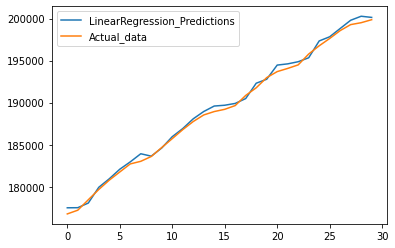

In [59]:
# As in the previous step we got LinearRegression  model error low, we plot for understanding 
plt.plot(pred_US,label="LinearRegression_Predictions")
plt.plot(y_US_test,label="Actual_data")
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

In [60]:
pred_BR = linear_model.predict(x_BR_test)
pred1_BR = random_forest.predict(x_BR_test)
pred2_BR = KNN_model.predict(x_BR_test)
pred3_BR = tree_model.predict(x_BR_test)

In [61]:
pred_BR = linear_model.predict(x_BR_test)
pred1_BR = random_forest.predict(x_BR_test)
pred2_BR = KNN_model.predict(x_BR_test)
pred3_BR = tree_model.predict(x_BR_test)

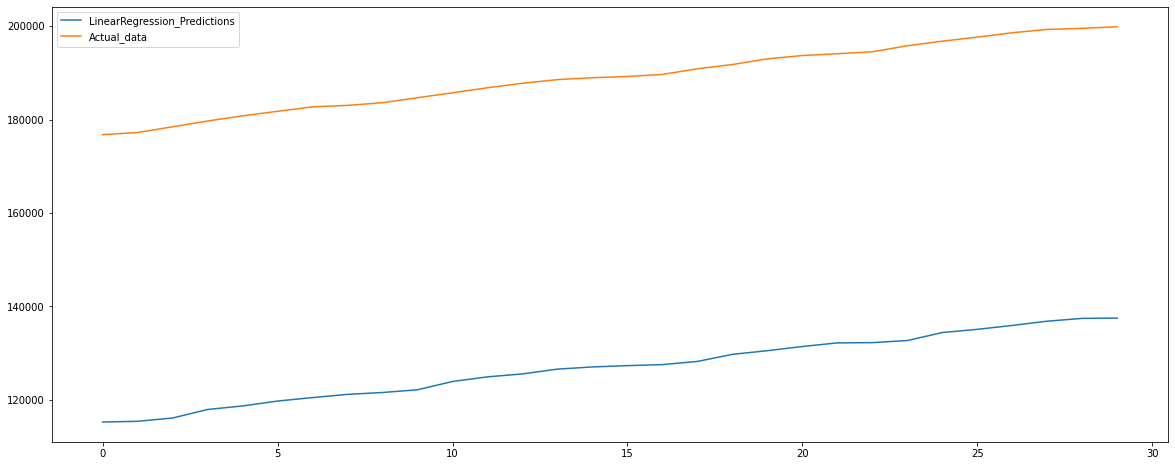

In [62]:
plt.plot(pred_BR,label="LinearRegression_Predictions")
plt.plot(y_US_test,label="Actual_data")
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()